In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('loan_approved.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Basic Check:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data.shape

(614, 13)

# EDA

In [9]:
data.loc[data['Gender'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [10]:
data.Gender.isnull().sum()/len(data)*100

2.1172638436482085

In [11]:
data.loc[data['Gender'].isnull()==True,'Gender']='Male'

In [12]:
data.Gender.isnull().sum()

0

In [13]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
data.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [15]:
data.loc[data['Dependents'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [16]:
data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
data.loc[data['Dependents'].isnull()==True,'Dependents']='0'

In [18]:
data.loc[data['Dependents']=='3+','Dependents']=3

In [19]:
data.Dependents=data.Dependents.replace({'0':0,'1':1,'2':2,'3':3})

In [20]:
data.Dependents.unique()

array([0, 1, 2, 3], dtype=int64)

In [21]:
data.Dependents.isnull().sum()

0

In [22]:
data.loc[data['Married'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
104,LP001357,Male,NaN,0,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,0,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,0,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [23]:
data.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [24]:
data.loc[data['Married'].isnull()==True,'Married']='Yes'

In [25]:
data.loc[data['Married'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)


In [26]:
len(data.loc[data['Married'].isnull()==True])

0

In [27]:
len(data.loc[data['Self_Employed'].isnull()==True])

32

In [28]:
data.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [29]:
data.loc[data['Self_Employed'].isnull()==True,'Self_Employed']='No'

In [30]:
len(data.loc[data['Self_Employed'].isnull()==True])

0

In [31]:
data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [32]:
data.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [33]:
data.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:>

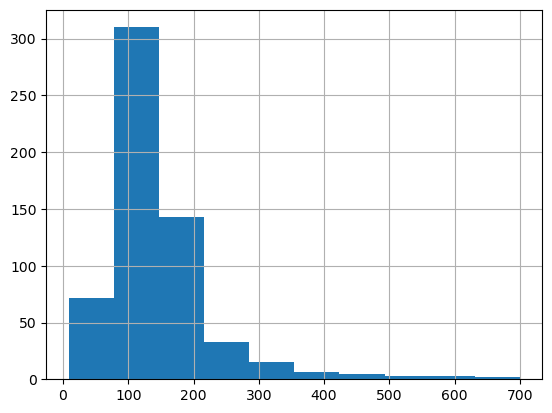

In [34]:
data.LoanAmount.hist()

In [35]:
np.median(data.LoanAmount.dropna(axis=0))

128.0

<AxesSubplot:>

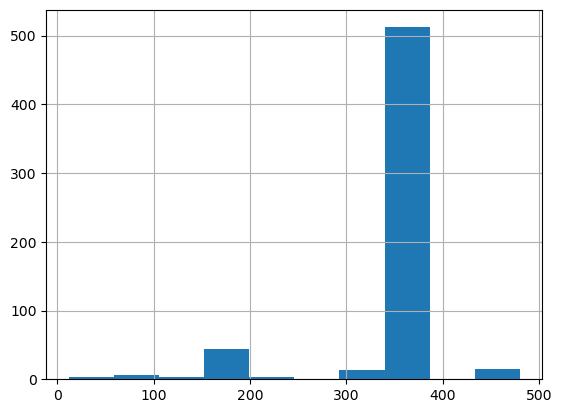

In [36]:
data.Loan_Amount_Term.hist()

In [37]:
np.median(data.Loan_Amount_Term.dropna(axis=0))

360.0

In [38]:
data.loc[data['LoanAmount'].isnull()==True,'LoanAmount']=np.median(data.LoanAmount.dropna(axis=0))
data.loc[data['Loan_Amount_Term'].isnull()==True,'Loan_Amount_Term']=np.median(data.Loan_Amount_Term.dropna(axis=0))
data.loc[data['Credit_History'].isnull()==True,'Credit_History']=1.0

In [39]:
data.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

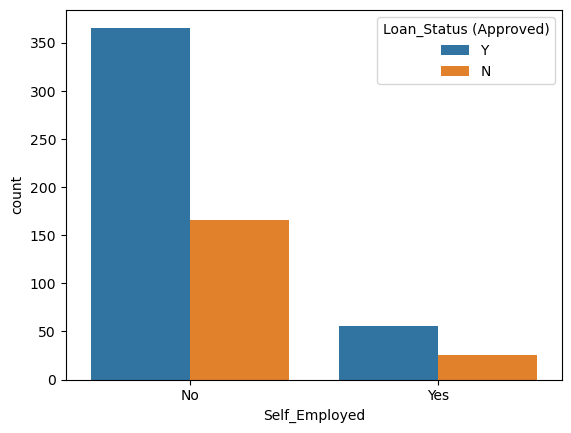

In [40]:
sns.countplot(x='Self_Employed',data=data,hue='Loan_Status (Approved)')

In [41]:
data.rename(columns={'Loan_Status (Approved)':'Loan_status'},inplace=True)

In [42]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_status'],
      dtype='object')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
lc=LabelEncoder()
lc

LabelEncoder()

In [46]:
data.Married=lc.fit_transform(data.Married)
data.Education=lc.fit_transform(data.Education)
data.Property_Area=lc.fit_transform(data.Property_Area)
data.Loan_status=lc.fit_transform(data.Loan_status)
data.Self_Employed=lc.fit_transform(data.Self_Employed)

In [47]:
data.Dependents=lc.fit_transform(data.Dependents)

In [48]:
data.Gender=pd.get_dummies(data.Gender,drop_first=True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    uint8  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_status        614 non-null    int32  
dtypes: float64(4), int32(5), int64(2), object(1), uint8(1)
memory usage: 46.3+ KB


In [50]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [51]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler

In [52]:
scale=MinMaxScaler()
scale

MinMaxScaler()

In [53]:
data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]=scale.fit_transform(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

In [54]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
0,LP001002,1,0,0,0,0,0.070489,0.000000,0.172214,0.74359,1.0,2,1
1,LP001003,1,1,1,0,0,0.054830,0.036192,0.172214,0.74359,1.0,0,0
2,LP001005,1,1,0,0,1,0.035250,0.000000,0.082489,0.74359,1.0,2,1
3,LP001006,1,1,0,1,0,0.030093,0.056592,0.160637,0.74359,1.0,2,1
4,LP001008,1,0,0,0,0,0.072356,0.000000,0.191027,0.74359,1.0,2,1


# Feature selection

In [55]:
corr_data=data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

<AxesSubplot:>

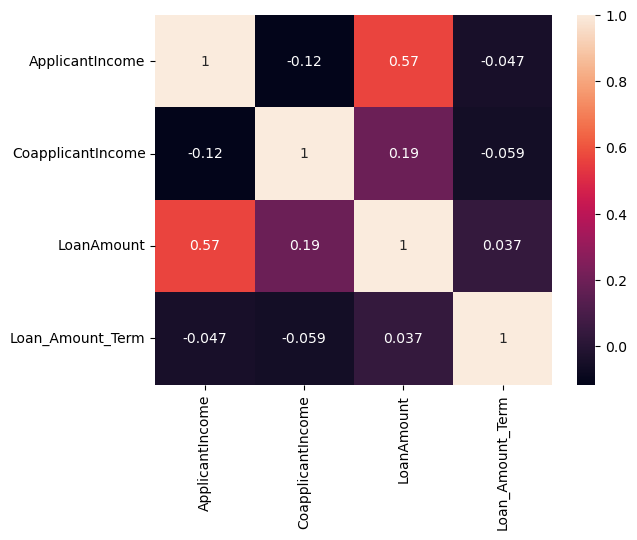

In [56]:
sns.heatmap(corr_data.corr(),annot=True)

In [57]:
corr_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,0.064978,0.038910,0.197905,0.706005
std,0.075560,0.070229,0.121718,0.137668
min,0.000000,0.000000,0.000000,0.000000
25%,0.033735,0.000000,0.132055,0.743590
50%,0.045300,0.028524,0.172214,0.743590
75%,0.069821,0.055134,0.225398,0.743590
max,1.000000,1.000000,1.000000,1.000000


In [58]:
data.duplicated().sum()

0

C:\Users\schan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_status', ylabel='count'>

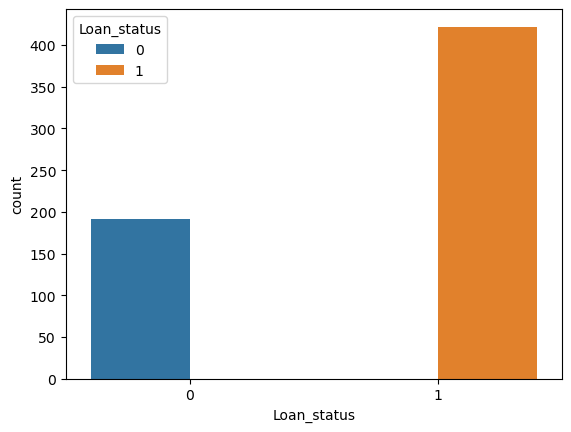

In [59]:
sns.countplot(data.Loan_status,data=data,hue='Loan_status')

# Model Creation

In [60]:
x=data.iloc[:,1:-1]
y=data.Loan_status

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state=3)

In [62]:
y.value_counts()

1    422
0    192
Name: Loan_status, dtype: int64

In [63]:
# balancing the dataset
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x_train,y_train)

In [64]:
from collections import Counter

In [65]:
print('Actual class',Counter(y_train))
print('SMOTE class',Counter(y_smote))

Actual class Counter({1: 301, 0: 159})
SMOTE class Counter({1: 301, 0: 301})


In [66]:
from sklearn.svm import SVC

In [67]:
svc=SVC()
svc.fit(x_smote,y_smote)

SVC()

In [68]:
y_hat=svc.predict(x_test)

In [69]:
y_hat

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0])

In [70]:
from sklearn.metrics import accuracy_score,classification_report,f1_score

In [71]:
ac=accuracy_score(y_hat,y_test)
ac

0.7142857142857143

In [72]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.39      0.61      0.48        33
           1       0.87      0.74      0.80       121

    accuracy                           0.71       154
   macro avg       0.63      0.67      0.64       154
weighted avg       0.77      0.71      0.73       154



In [73]:
cm1=pd.crosstab(y_test,y_hat)
cm1

col_0,0,1
Loan_status,,
0,20,13
1,31,90


In [74]:
f1=f1_score(y_test,y_hat)
f1

0.8035714285714285

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
scores = cross_val_score(svc,x,y,cv=3,scoring='f1')
print(scores)
print('cv:',scores.mean())
print('std:',scores.std())

[0.87066246 0.86875    0.89032258]
cv: 0.8765783470709948
std: 0.009749951923361921


In [77]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001]}
grid=GridSearchCV(SVC(random_state=42),param_grid,verbose=3,cv=3,scoring='f1')
grid.fit(x_smote,y_smote)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ....................C=0.1, gamma=1;, score=0.712 total time=   0.0s
[CV 2/3] END ....................C=0.1, gamma=1;, score=0.705 total time=   0.0s
[CV 3/3] END ....................C=0.1, gamma=1;, score=0.727 total time=   0.0s
[CV 1/3] END ..................C=0.1, gamma=0.1;, score=0.681 total time=   0.0s
[CV 2/3] END ..................C=0.1, gamma=0.1;, score=0.764 total time=   0.0s
[CV 3/3] END ..................C=0.1, gamma=0.1;, score=0.759 total time=   0.0s
[CV 1/3] END .................C=0.1, gamma=0.01;, score=0.000 total time=   0.0s
[CV 2/3] END .................C=0.1, gamma=0.01;, score=0.664 total time=   0.0s
[CV 3/3] END .................C=0.1, gamma=0.01;, score=0.751 total time=   0.0s
[CV 1/3] END ................C=0.1, gamma=0.001;, score=0.000 total time=   0.0s
[CV 2/3] END ................C=0.1, gamma=0.001;, score=0.664 total time=   0.0s
[CV 3/3] END ................C=0.1, gamma=0.001;

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [78]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.01}
SVC(C=10, gamma=0.01, random_state=42)


In [79]:
clf=SVC(C=1, gamma=0.1, random_state=42) 

In [80]:
clf.fit(x_smote, y_smote)

SVC(C=1, gamma=0.1, random_state=42)

In [81]:
y_clf=clf.predict(x_test)

In [82]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

           0       0.43      0.61      0.51        33
           1       0.88      0.79      0.83       121

    accuracy                           0.75       154
   macro avg       0.66      0.70      0.67       154
weighted avg       0.78      0.75      0.76       154



In [83]:
cm=pd.crosstab(y_test,y_clf)
cm

col_0,0,1
Loan_status,,
0,20,13
1,26,95


In [84]:
f1=f1_score(y_test,y_clf)
f1

0.829694323144105

In [85]:
scores_after = cross_val_score(clf,x,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores_after.std())

[0.87066246 0.86875    0.89032258]
Cross validation Score: 0.8765783470709948
Std : 0.009749951923361921
